# Abstract

## A glance at the data.
This data was collected in 2014. The various products, campaigns , customer information of this particular business were recorded over the period of two years. In this analysis we keep that in mind when calculating things like the age of customers which will  be detailed in item ##

    first, We import the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest as ztest
import seaborn as sns
from scipy.stats import ttest_ind

%matplotlib inline

In [3]:
md = pd.read_csv("C:/Users/Acer/Documents/Sadaia T5/Python2/MarketingCampaignProj/1689942193_marketing_data/marketing_data.csv")

# Investigating the data

In [4]:
md.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [5]:
md.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   2240 non-null   int64 
 1   Year_Birth           2240 non-null   int64 
 2   Education            2240 non-null   object
 3   Marital_Status       2240 non-null   object
 4    Income              2216 non-null   object
 5   Kidhome              2240 non-null   int64 
 6   Teenhome             2240 non-null   int64 
 7   Dt_Customer          2240 non-null   object
 8   Recency              2240 non-null   int64 
 9   MntWines             2240 non-null   int64 
 10  MntFruits            2240 non-null   int64 
 11  MntMeatProducts      2240 non-null   int64 
 12  MntFishProducts      2240 non-null   int64 
 13  MntSweetProducts     2240 non-null   int64 
 14  MntGoldProds         2240 non-null   int64 
 15  NumDealsPurchases    2240 non-null   int64 
 16  NumWeb

In [7]:
md["Complain"][md["Complain"] == 1].count()

21

    21 people out of 2240 made a complaint in the last two years

In [8]:
# ensuring there are no duplicated IDs
md.ID.nunique()

2240

    Choosing the appropriate data type for Dt_Customer

In [9]:
# when printing this code we notice both dates are from 2013 , bringing to our attention that this column in seen as a string by python.
"earliest customer" , md.Dt_Customer.min(),"latest customer", md.Dt_Customer.max()

('earliest customer', '1/1/13', 'latest customer', '9/9/13')

In [10]:
# chaning the data type to datetime
md.Dt_Customer = pd.to_datetime(md.Dt_Customer)

In [11]:
"earliest customer" , md.Dt_Customer.min(),"latest customer", md.Dt_Customer.max()

('earliest customer',
 Timestamp('2012-07-30 00:00:00'),
 'latest customer',
 Timestamp('2014-06-29 00:00:00'))

    The name of this column contains spaces making it dificult to deal with so we rename the column.

In [12]:
md.rename(columns={" Income ": "Income"}, inplace = True)

# Data Cleaning 

    We notice some awkward and redundant categories in both the "Marital_status" and <br>
    "Education" columns. Using common sense and some googling we combine values that have the same meaning. 

In [13]:
md.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [14]:
md.Education.unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [15]:
# replacing redundant values
#  Marital status
md.Marital_Status.replace('Alone', 'Single', inplace=True)
md.Marital_Status.replace('YOLO', 'Single', inplace=True)
md.Marital_Status.replace('Absurd', 'Single', inplace=True)
#  Education
md.Education.replace('2n Cycle','Master',inplace=True)
# re-printing unique values to check the change
md.Marital_Status.unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

In [16]:
md.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic'], dtype=object)

    Cleaning the Income column from special charachters and changing the data type to float

In [17]:
md['Income'] = md['Income'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11276\2805114819.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  md['Income'] = md['Income'].astype(str).str.replace('$', '').str.replace(',', '').astype(float)


####  Group by 'Education' and 'Marital_Status' to calculate the average income


replacing the missing values with the mean from comprable groups.

In [18]:
average_income_by_group = md.groupby(['Education', 'Marital_Status'])['Income'].mean()

In [19]:
average_income_by_group

Education   Marital_Status
Basic       Divorced           9548.000000
            Married           21960.500000
            Single            18238.666667
            Together          21240.071429
            Widow             22123.000000
Graduation  Divorced          54526.042017
            Married           50800.258741
            Single            51365.633065
            Together          55758.480702
            Widow             54976.657143
Master      Divorced          49972.833333
            Married           50686.055046
            Single            53751.079646
            Together          49495.936709
            Widow             56211.125000
PhD         Divorced          53096.615385
            Married           58138.031579
            Single            53039.666667
            Together          56041.422414
            Widow             60288.083333
Name: Income, dtype: float64

    defining a function and using the apply function to automate the imputation process

In [20]:
def impute_income(row):
    if pd.isna(row['Income']):
        return average_income_by_group.loc[(row['Education'], row['Marital_Status'])]
    return row['Income']

In [21]:
md['Income'] = md.apply(impute_income, axis=1)

    Check for missing values in 'Income' after imputation and save to new file


In [22]:
missing_income_count_after = md['Income'].isnull().sum()
print(f"Number of missing 'Income' values after imputation: {missing_income_count_after}")

Number of missing 'Income' values after imputation: 0


## Attribute engineering

###  Age

We calculate the age by subtracting from 2014 because we are interested in the customer age <br>at the time of data collection. i.e. at the time their transcations were made.

In [23]:
md["Age"] = (2014 - md.Year_Birth)

In [24]:
md.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1,0,0,0,0,0,1,0,SP,44
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,5,0,0,0,0,1,1,0,CA,53
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,2,0,0,0,0,0,0,0,US,56
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,7,0,0,0,0,0,0,0,AUS,47
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,7,1,0,0,0,0,1,0,SP,25


    examining the new column

In [25]:
md.Age.mean(), md.Age.max()

(45.19419642857143, 121)

In [26]:
md[md["Year_Birth"] < 1930]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Age
513,11004,1893,Master,Single,60182.0,0,1,2014-05-17,23,8,...,4,0,0,0,0,0,0,0,SA,121
827,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,1,0,0,1,0,0,0,0,SP,115
2233,7829,1900,Master,Divorced,36640.0,1,0,2013-09-26,99,15,...,5,0,0,0,0,0,0,1,IND,114


### Total number of children

In [27]:
md['Total_Children'] = md['Kidhome'] + md['Teenhome']

In [28]:
md[['Total_Children', 'Kidhome', "Teenhome"]].head()

,Total_Children,Kidhome,Teenhome
0,0,0,0
1,0,0,0
2,1,0,1
3,2,1,1
4,1,1,0


### Total spending

In [29]:
md["total_spending"] = md["MntWines"] + md["MntFruits"] + md["MntMeatProducts"] + md["MntFishProducts"] + md["MntSweetProducts"]+ md["MntGoldProds"]


## Distribution and outlier analysis

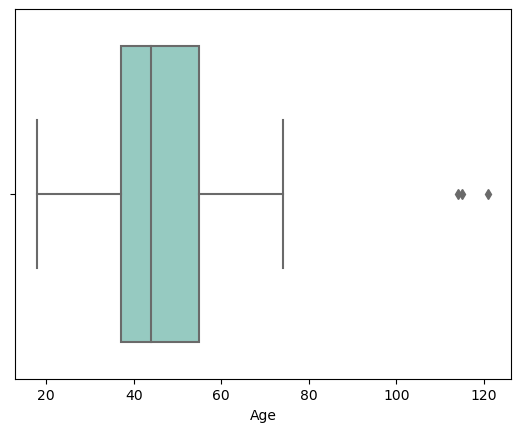

In [30]:
sns.boxplot( x = md['Age'],palette = "Set3");

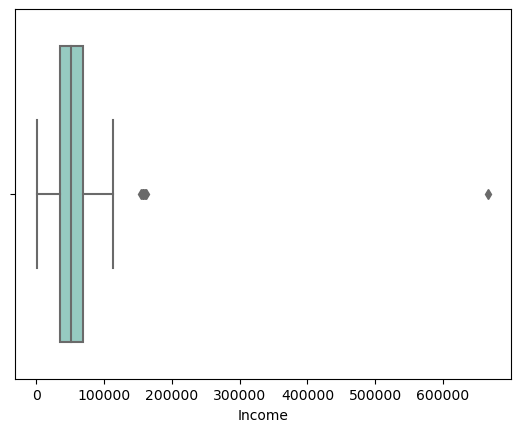

In [31]:
sns.boxplot( x = md['Income'],palette = "Set3")
plt.show()

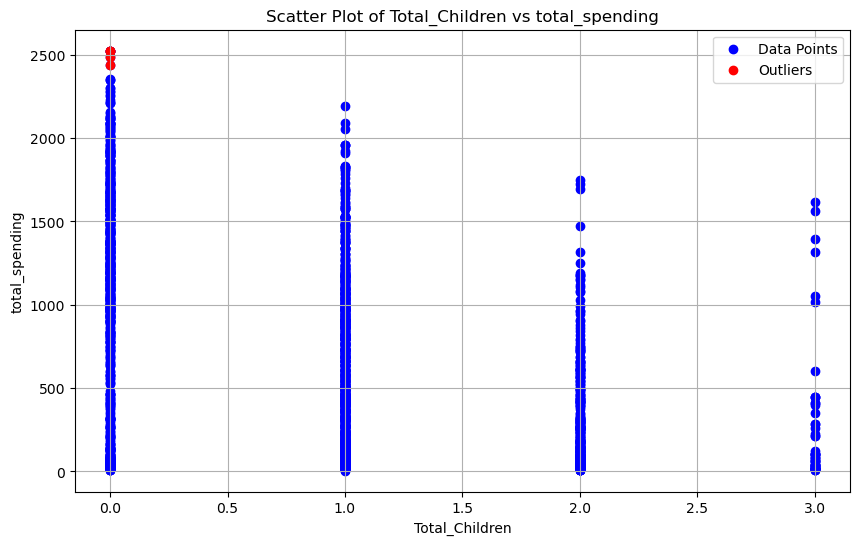

In [32]:
# Calculate the z-scores for 'total_spending' to identify outliers
from scipy import stats
z_scores = stats.zscore(md['total_spending'])

# Define a threshold for identifying outliers (e.g., z-score > 3)
outlier_threshold = 3

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(md['Total_Children'], md['total_spending'], c='b', label='Data Points')

# Highlight the outliers in red
outliers = md['total_spending'][z_scores > outlier_threshold]
plt.scatter(md['Total_Children'][z_scores > outlier_threshold], outliers, c='r', label='Outliers')

plt.xlabel('Total_Children')
plt.ylabel('total_spending')
plt.title('Scatter Plot of Total_Children vs total_spending')
plt.legend()
plt.grid(True)
plt.show()


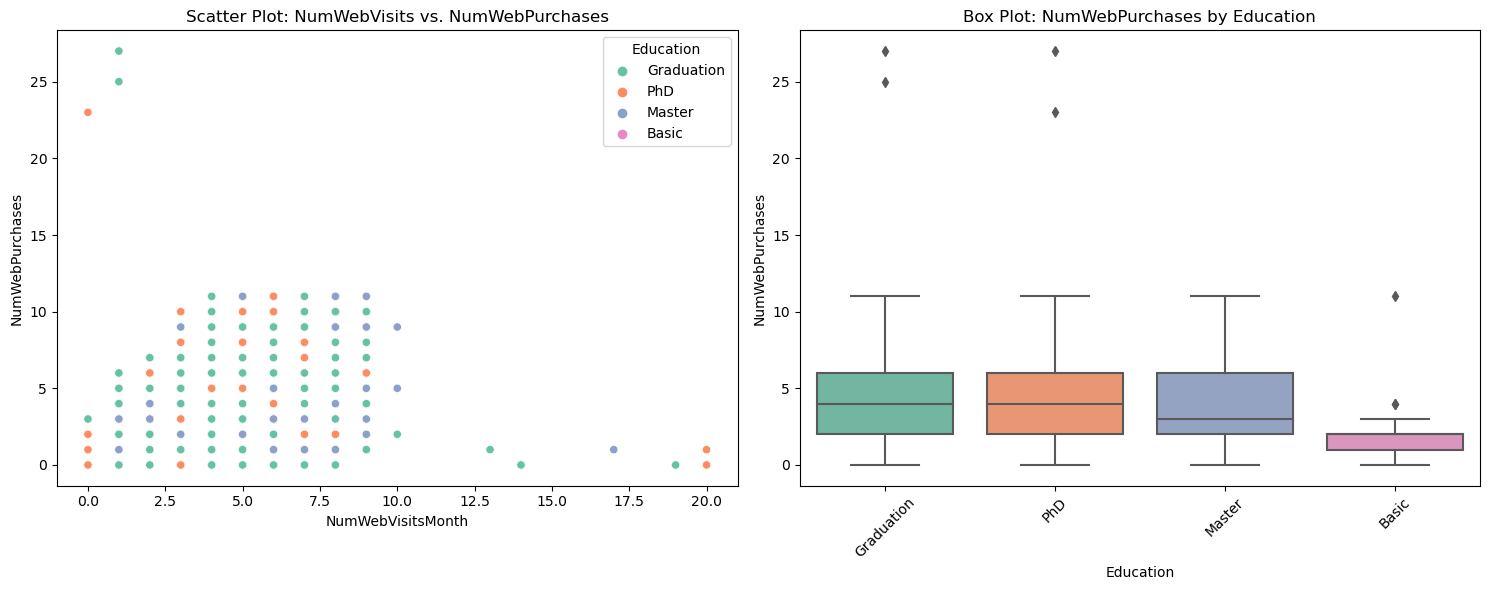

In [33]:
# Select relevant columns for analysis
columns_to_analyze = ['Education', 'NumWebVisitsMonth', 'NumWebPurchases']

# Create subplots for visualizations
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Create a scatter plot to explore the relationship between 'NumWebVisitsMonth' and 'NumWebPurchases'
sns.scatterplot(data=md, x='NumWebVisitsMonth', y='NumWebPurchases', hue='Education', ax=axes[0],palette = "Set2")
axes[0].set_title('Scatter Plot: NumWebVisits vs. NumWebPurchases')

# Create a box plot to visualize the distribution of 'NumWebPurchases' by education level
sns.boxplot(data=md, x='Education', y='NumWebPurchases', ax=axes[1],palette = "Set2")
axes[1].set_title('Box Plot: NumWebPurchases by Education')

# Rotate x-axis labels for better visibility in the box plot
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

    We notice that people with Basic education level have the least number of purchaces compared to other education levels.

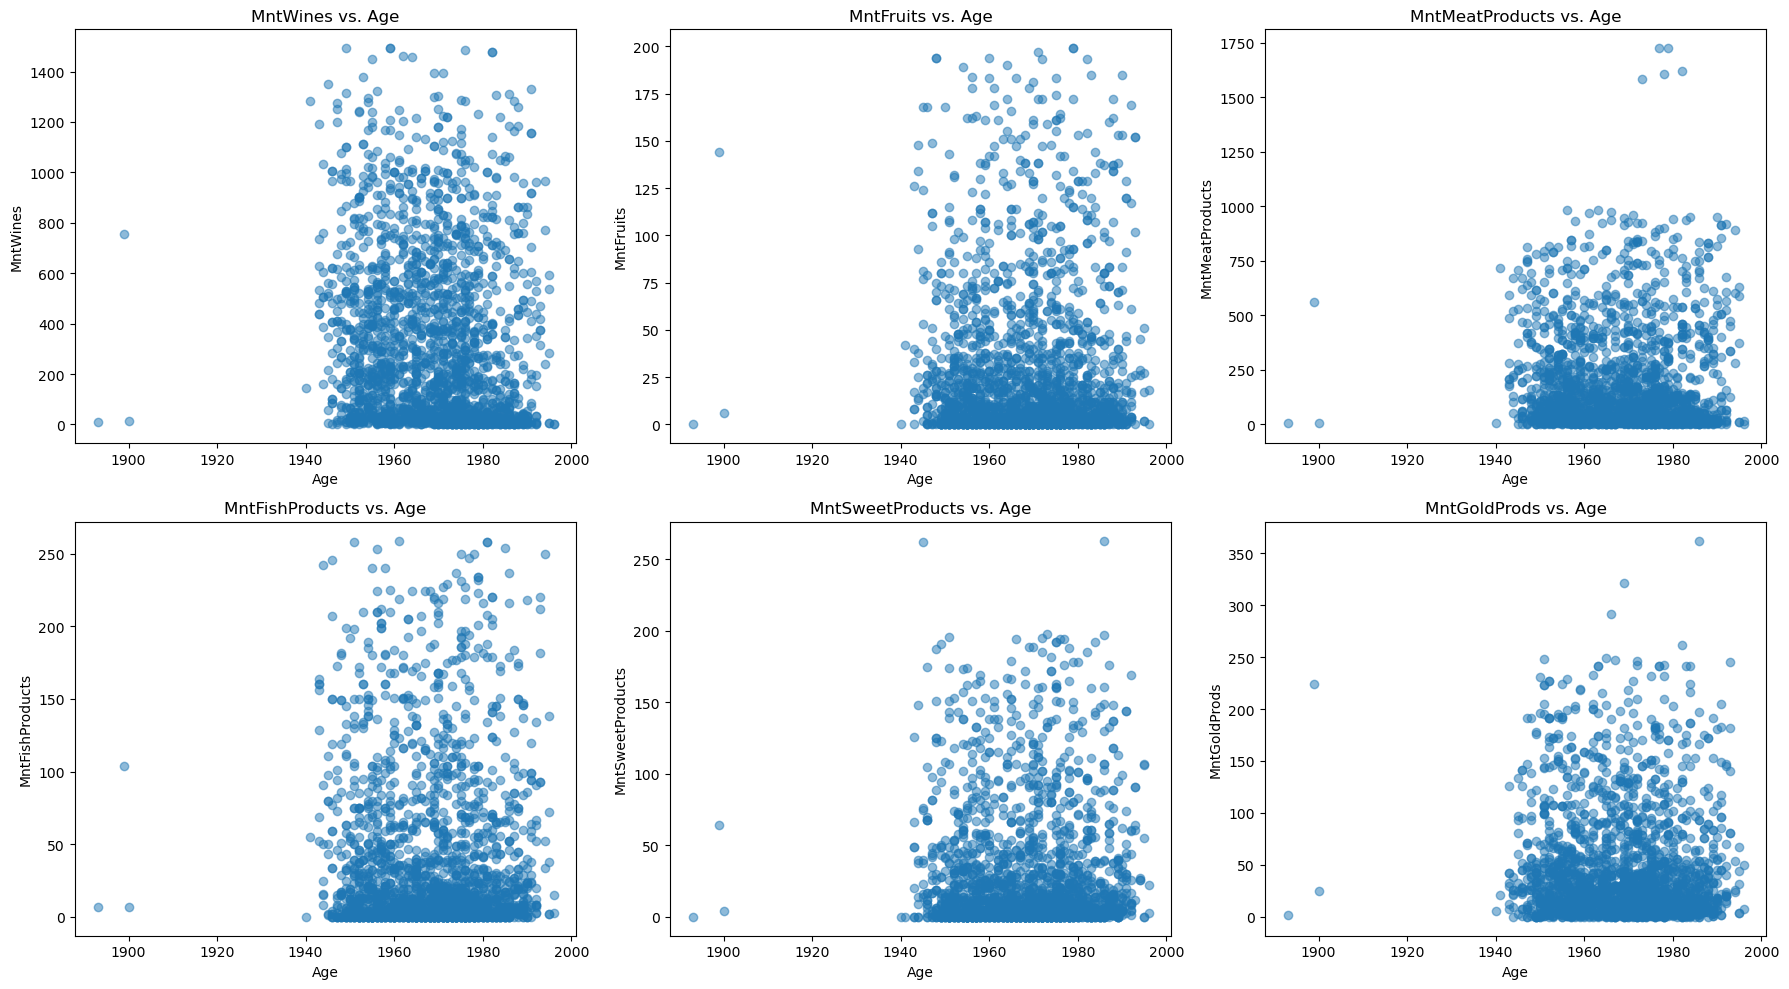

In [34]:
# List of spending categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Create scatter plots for Age vs. each spending category
for i, category in enumerate(spending_categories):
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].scatter(md['Year_Birth'], md[category], alpha=0.5)
    axes[row_index, col_index].set_title(f'{category} vs. Age')
    axes[row_index, col_index].set_xlabel('Age')
    axes[row_index, col_index].set_ylabel(category)

plt.tight_layout()
plt.show()

    Removing the Age outliers and reruning the plots 

In [35]:
md = md[md["Age"]<100]

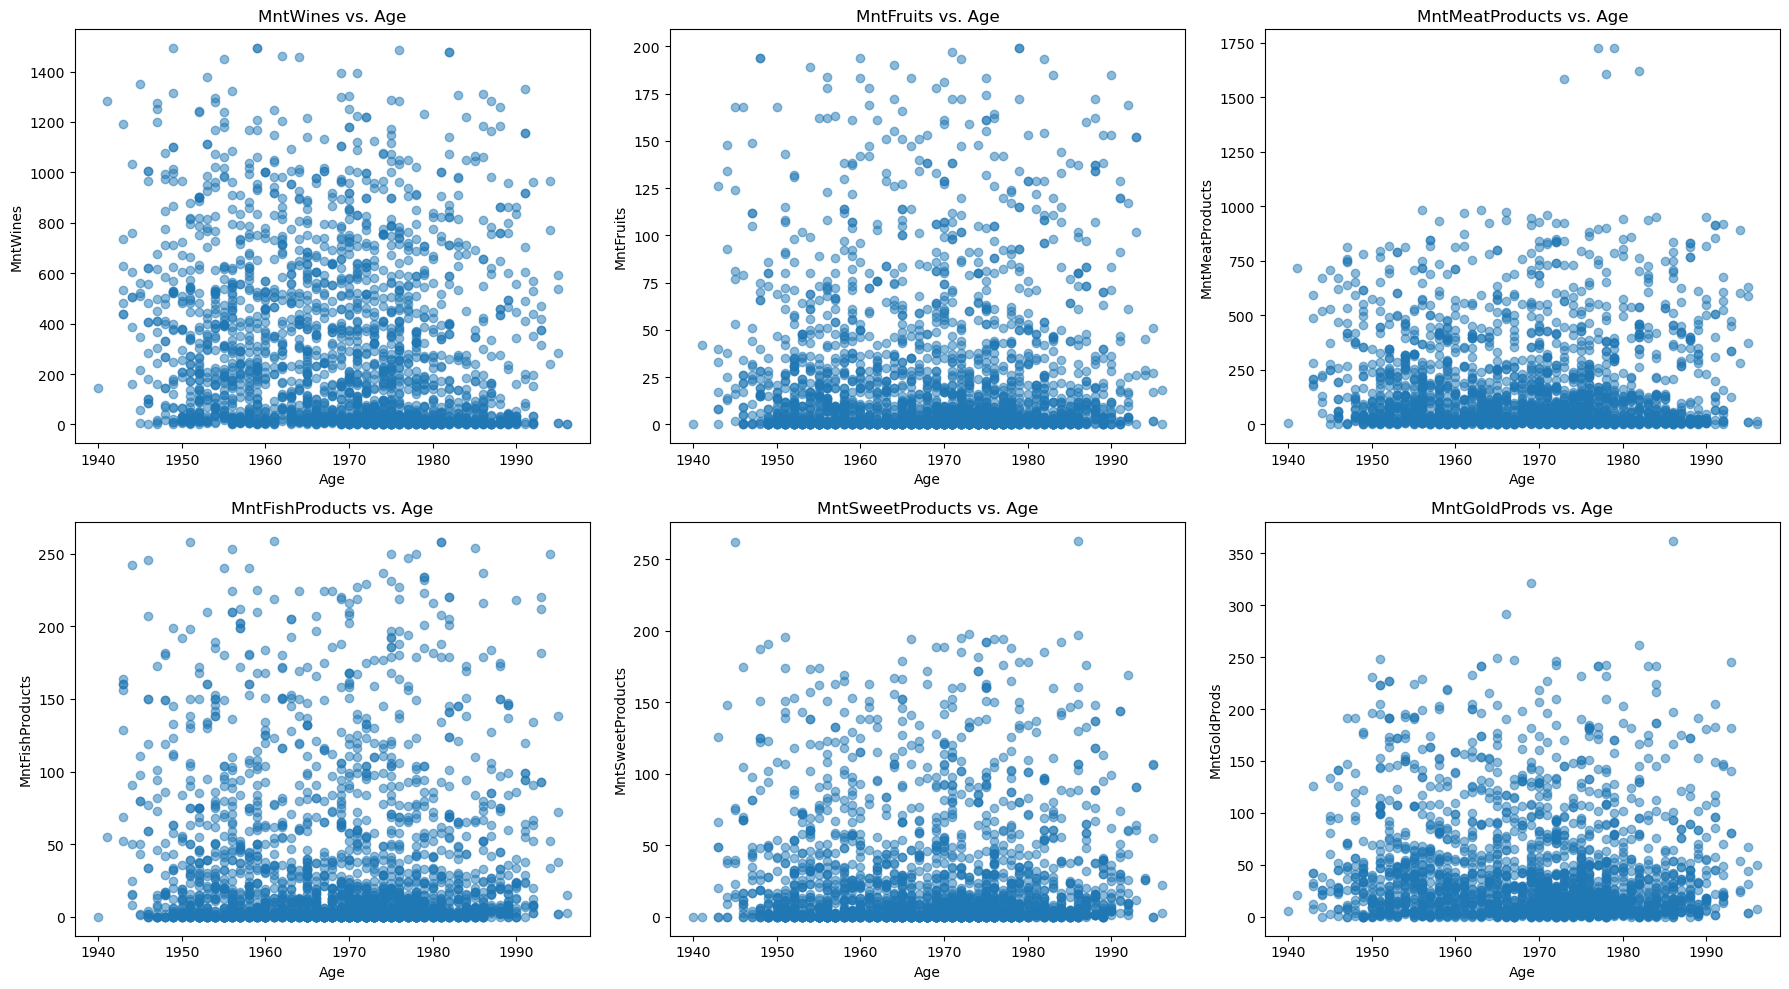

In [36]:
# List of spending categories
spending_categories = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create subplots for scatter plots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Create scatter plots for Age vs. each spending category
for i, category in enumerate(spending_categories):
    row_index = i // 3
    col_index = i % 3
    axes[row_index, col_index].scatter(md['Year_Birth'], md[category], alpha=0.5)
    axes[row_index, col_index].set_title(f'{category} vs. Age')
    axes[row_index, col_index].set_xlabel('Age')
    axes[row_index, col_index].set_ylabel(category)

plt.tight_layout()
plt.show()

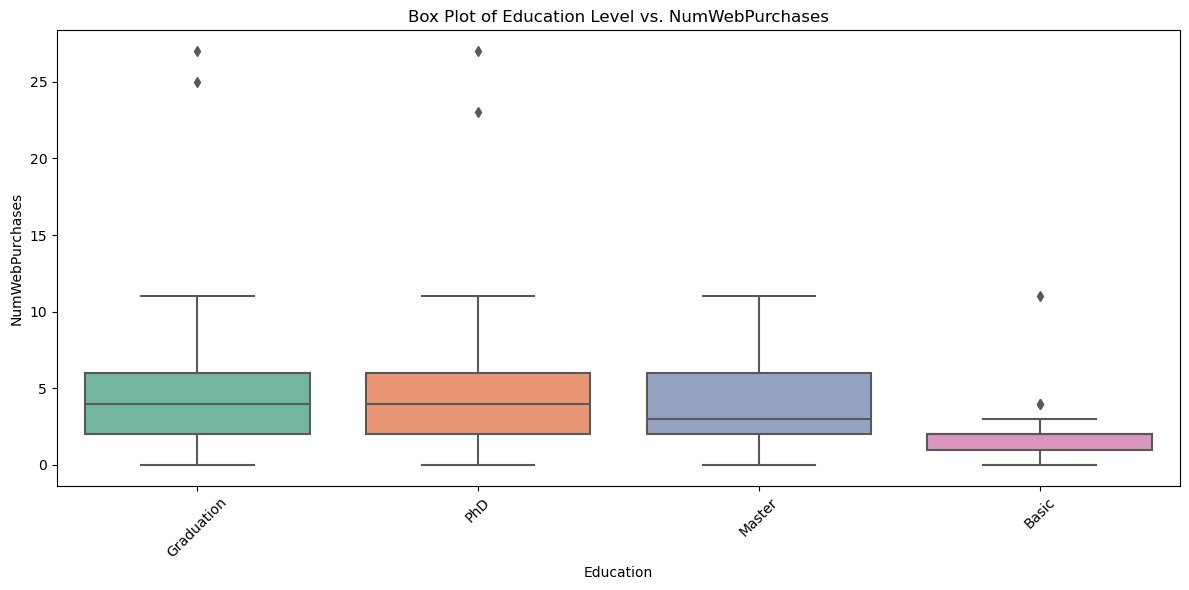

In [37]:
# Create a box plot to compare education levels with online purchases
plt.figure(figsize=(12, 6))
sns.boxplot(data=md, x='Education', y='NumWebPurchases',palette = "Set2")
plt.title('Box Plot of Education Level vs. NumWebPurchases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Dropping redundunt attributes

In [38]:
md.drop(['Year_Birth', 'Kidhome', "Teenhome"], axis = 1, inplace = True)

## saveing a copy of the data

In [39]:
import copy

In [40]:
df = copy.deepcopy(md)

## One Hot encoding the Complain , Marital Status , and Country

In [41]:
md = pd.get_dummies(md, columns =["Complain", "Marital_Status","Country"])

In [42]:
md.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Total_Children', 'total_spending',
       'Complain_0', 'Complain_1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US'],
      dtype='object')

## Ordinal Encoding Education

In [43]:
from sklearn.preprocessing import OrdinalEncoder 

In [44]:
enc = OrdinalEncoder()

In [45]:
enc

OrdinalEncoder()

In [46]:
education_encoding = {'Basic' : 0, 
             'Graduation' : 1,
             'Master' : 2,
             'PhD' : 3
            }

In [47]:
md["Education"] = md["Education"].replace(education_encoding)

In [48]:
enc.fit_transform(md[["Education"]])

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [3.]])

In [49]:
md.Education.unique()

array([1, 3, 2, 0], dtype=int64)

In [50]:
md.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Total_Children', 'total_spending',
       'Complain_0', 'Complain_1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US'],
      dtype='object')

In [51]:
md.to_csv('cleaned_data.csv', index=False)

## Heat map

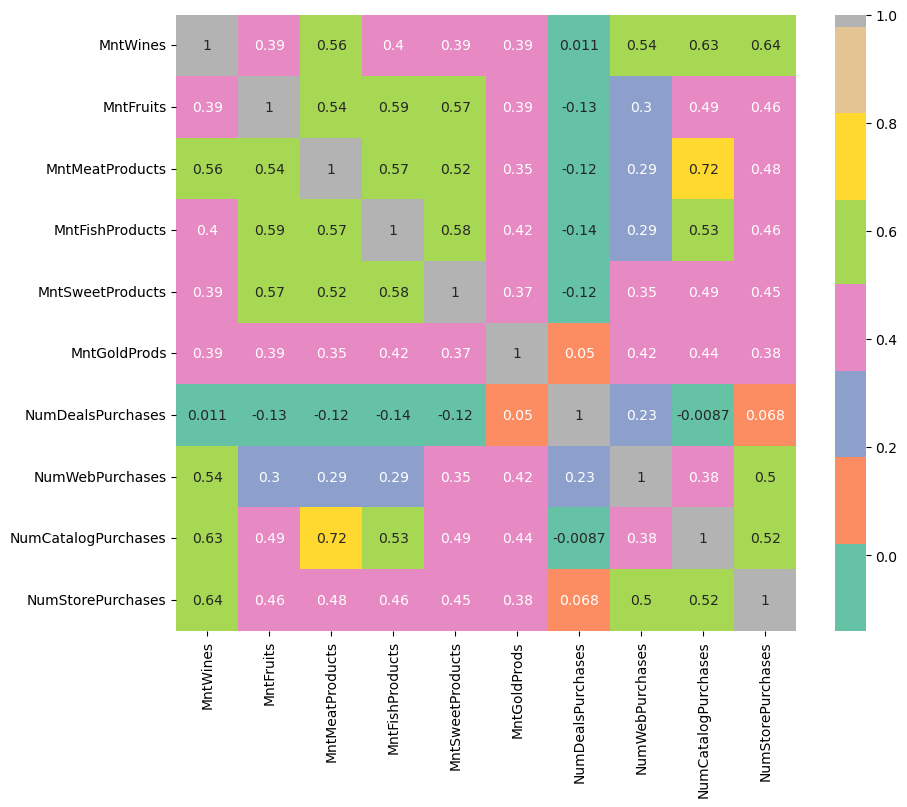

In [52]:
plt.figure(figsize = [10, 8])
sns.heatmap(md[["MntWines","MntFruits","MntMeatProducts","MntFishProducts","MntSweetProducts","MntGoldProds",'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].corr(), annot = True ,cmap= "Set2", center = 0.5)
plt.show()

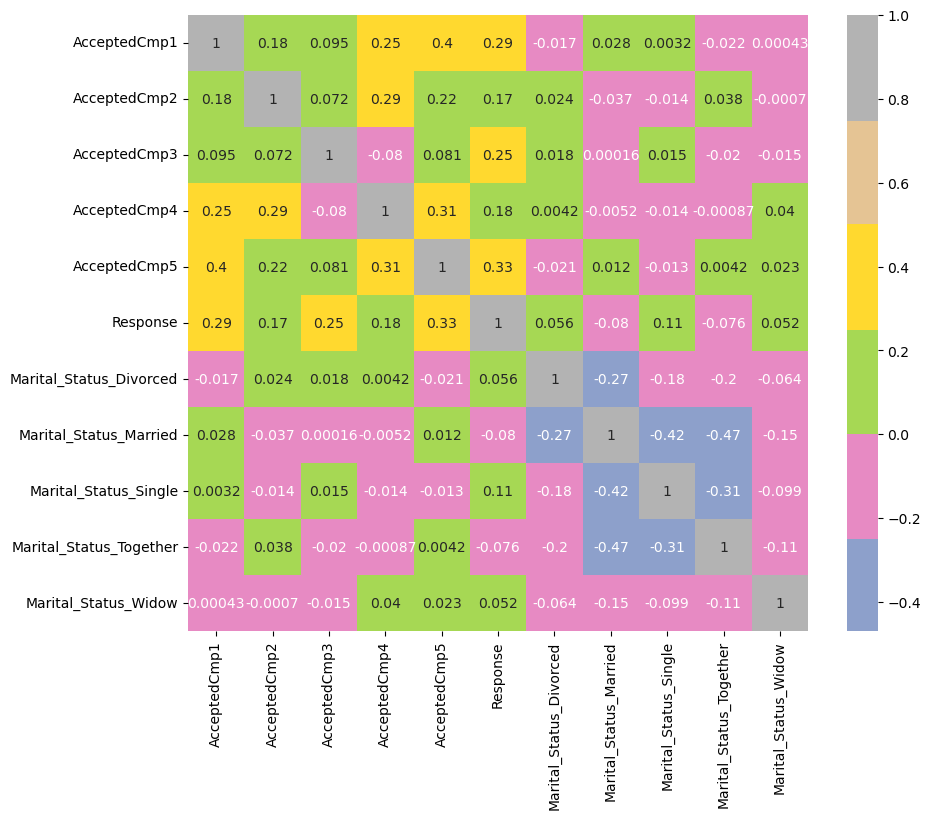

In [53]:
plt.figure(figsize = [10, 8])
sns.heatmap(md[["AcceptedCmp1","AcceptedCmp2","AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","Response",'Marital_Status_Divorced','Marital_Status_Married', 'Marital_Status_Single','Marital_Status_Together', 'Marital_Status_Widow']].corr(), annot = True ,cmap= "Set2" ,center = 0)
plt.show()

# Hypothesis Testing

## The First Hypothesis

        "Older people are not as tech-savvy and probably prefer shopping in-store."

Independant variable : Age <br>
dependent variable: NumWebPurchases <br>
We want to see if there's a significant difference in online purchases between young and older customers

### The Null and Alternative hypothese

          There's no significant difference in online purchases between young and older customers.
$$
H_0 : \mu = \mu_0
$$

         There's a significant difference in online purchases between young and older customers.   
$$
H_1 = \mu \gt \mu_0
$$

In [54]:

# Define the age threshold to separate young and older customers
age_threshold = 60

# Create two groups based on age
young_customers = md[md['Age'] < age_threshold]['NumWebPurchases']
older_customers = md[md['Age'] >= age_threshold]['NumWebPurchases']

# Perform a t-test to compare online purchases between the two groups
t_statistic, p_value = ttest_ind(young_customers, older_customers)

# Define the significance level (alpha)
alpha = 0.05  

# Compare the p-value to the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
    print("There's a significant difference in online purchases between young and older customers.")
else:
    print("Fail to reject the null hypothesis")
    print("There's no significant difference in online purchases between young and older customers.")

# Print the t-statistic and p-value
print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

Reject the null hypothesis
There's a significant difference in online purchases between young and older customers.
T-Statistic: -3.9761767435259214
P-Value: 7.22572474523568e-05


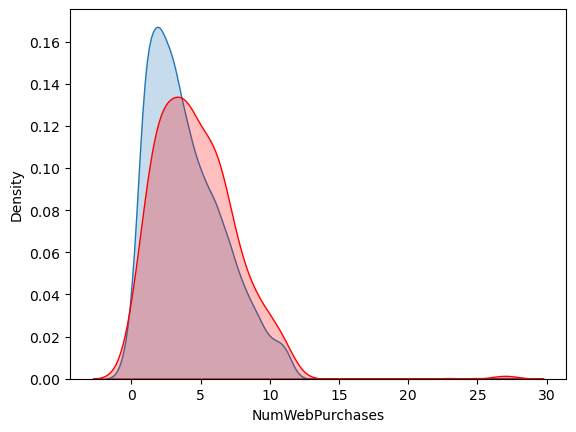

In [55]:
sns.kdeplot(young_customers, cbar = True, fill = True)
sns.kdeplot(older_customers, cbar = True, fill = True, color = "red");

## The Second  Hypothesis


        Customers with kids have a different preference for online shopping compared to customers without kids.   
$$
H_1 = \mu \gt \mu_0
$$

         Customers with kids have the same preference for online shopping as customers without kids.
$$
H_0 : \mu = \mu_0
$$

In [56]:
store_sample = md["NumStorePurchases"]
web_sample = md["NumWebPurchases"]

In [57]:
store_sample.mean()

5.794367456414841

In [58]:
_ , p_value = ztest(store_sample,web_sample,value = 0)

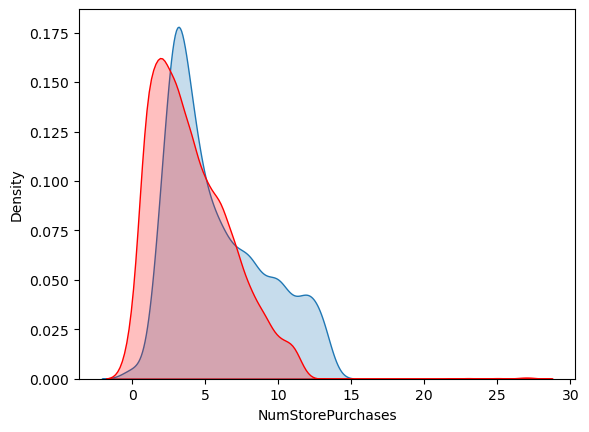

In [59]:
sns.kdeplot(store_sample, cbar = True, fill = True)
sns.kdeplot(web_sample, cbar = True, fill = True, color = "red");

In [60]:
p_value

1.7213334713244034e-79

In [61]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")

Reject the null hypothesis: There is a significant difference between the two groups.


The resulting p-value was smaller than $\alpha$. Therefor we reject the null hypothesis

In other words, There is enough evidence to suggest that the     Customers with kids have a different preference for online shopping compared to customers without kids.   


## The Third  Hypothesis


In [62]:
md["channel_purch"] = md["NumDealsPurchases"] + md["NumWebPurchases"] + md["NumCatalogPurchases"]+ md["NumStorePurchases"]
md.head()

,ID,Education,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Widow,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,channel_purch
0,1826,1,84835.0,2014-06-16,0,189,104,379,111,189,...,0,0,0,0,0,0,0,1,0,15
1,1,1,57091.0,2014-06-15,0,464,5,64,7,0,...,0,0,1,0,0,0,0,0,0,18
2,10476,1,67267.0,2014-05-13,0,134,11,59,15,2,...,0,0,0,0,0,0,0,0,1,11
3,1386,1,32474.0,2014-05-11,0,10,0,1,0,0,...,0,1,0,0,0,0,0,0,0,4
4,5371,1,21474.0,2014-04-08,0,6,16,24,11,0,...,0,0,0,0,0,0,0,1,0,8


In [63]:
sample = md["NumStorePurchases"]
population = md["channel_purch"]

In [64]:
population.mean()

14.87080911935628

In [65]:
sample.mean()

5.794367456414841

In [66]:
ztest(sample ,value = population.mean())

(-132.05039469435278, 0.0)

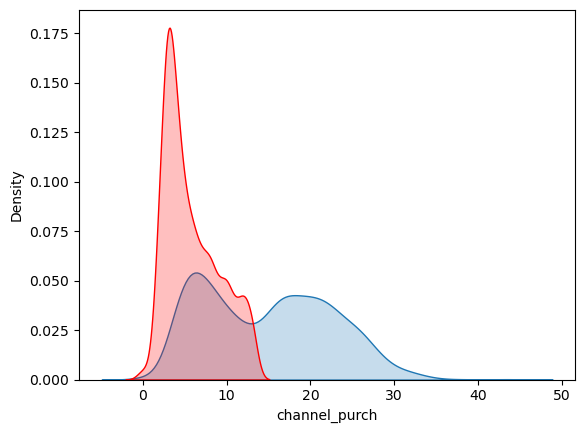

In [67]:
sns.kdeplot(population, cbar = True, fill = True)
sns.kdeplot(sample, cbar = True, fill = True ,color = "red");

# Hypothesis Testing #4

## The Null and Alternative hypotheses

    -US  spending  does not differ from total purchases
$
H_0 : \mu = \mu_0
$

    -US spending is significantly greater than that of other countries
$
H_1 = \mu \gt \mu_0
$

lets assume $\alpha = 0.05 $ level of significance
meaning we assume the probability of our sample mean falling near the null <br>mean is greater than 0.05 (not by chance)

Independant variable : US_Country ; representing customers from the US <br>
dependent variable: total spending <br>
We want to see if a sample being from the US affects the sample mean significantly.

In [68]:
md["total_purch"] = md['NumDealsPurchases']+ md['NumWebPurchases']+ md['NumCatalogPurchases']+ md['NumStorePurchases']

In [69]:
ht4= md[["ID","Country_AUS","Country_CA","Country_GER","Country_IND","Country_ME","Country_SA","Country_SP","Country_US","total_purch"]]

In [70]:
ht4.shape
ht4.head()

,ID,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US,total_purch
0,1826,0,0,0,0,0,0,1,0,15
1,1,0,1,0,0,0,0,0,0,18
2,10476,0,0,0,0,0,0,0,1,11
3,1386,1,0,0,0,0,0,0,0,4
4,5371,0,0,0,0,0,0,1,0,8


In [71]:
ht4.shape

(2237, 10)

In [72]:
ht4[ht4["Country_US"] == 1].shape

(109, 10)

In [73]:
us_count = ht4[ht4["Country_US"] == 1]["Country_US"].count()
total_count = ht4.ID.count()

In [74]:
us_count, total_count

(109, 2237)

Looking at US proportion to check that our data is balanced

In [75]:
us_proportion = us_count/total_count
us_proportion

0.048725972284309346

proportion of US compared to other countries?

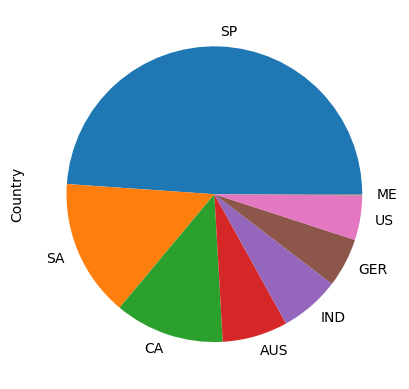

In [76]:
df.Country.value_counts().plot(kind="pie");


In [77]:
ht4.total_purch.mean()

14.87080911935628

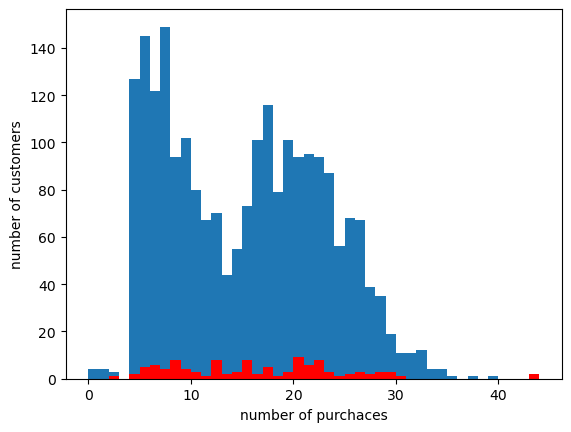

In [78]:
binsize = 1
bins = np.arange(0, ht4[ht4["Country_US"] == 1].total_purch.max()+binsize, binsize)

plt.hist(ht4.total_purch, bins=bins)
plt.hist(ht4[ht4["Country_US"] == 1].total_purch, bins=bins, color = "red")
plt.xlabel("number of purchaces")
plt.ylabel("number of customers");

## Z-test

In [79]:
size = us_count

In [80]:
pop = ht4["total_purch"]

In [81]:
pop_mean = pop.mean()

In [82]:
pop_mean

14.87080911935628

In [83]:
pop_std = pop.std()

In [84]:
sample = ht4[ht4["Country_US"] == 1].total_purch

In [85]:
sample.mean()

16.155963302752294

In [86]:
sample_mean = sample.mean()

In [87]:
sample_std = sample.std()

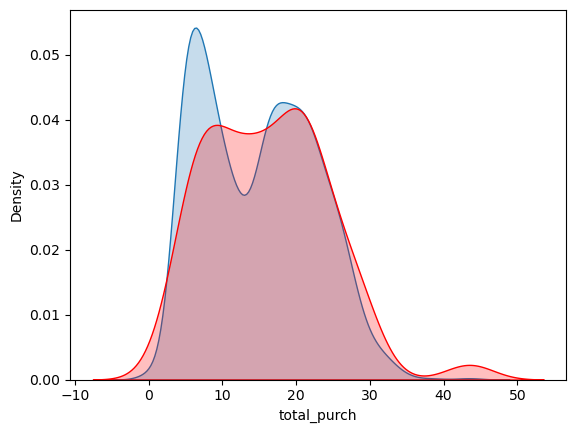

In [88]:
sns.kdeplot(pop, cbar = True, fill = True)
sns.kdeplot(sample, cbar = True, fill = True, color = "red");

    Calculating the z-score using the mathmatical formula

In [89]:
z_score = (sample_mean - pop_mean)/(pop_std/np.sqrt(size))

In [90]:
z_score

1.7478331003794976

    Calculating the z-score using the statsmodels package

In [91]:
ztest(sample ,value = pop_mean , alternative = 'larger')

(1.643478105985681, 0.05014202579917065)

The resulting p-value was smaller than $\alpha$. Therefor we reject the null hypothesis

In other words, There is enough evidence to suggest that the US total purchasing is greater than that of other countries.

# --------------------

# Z-Test with sampling

In [92]:
US_purch = ht4[ht4["Country_US"] == 1].total_purch

In [93]:
US_purch

2       11
8       20
10      22
49      17
93      15
        ..
2216    22
2217    22
2218    29
2234    20
2235    20
Name: total_purch, Length: 109, dtype: int64

In [94]:
US_purch.mean() , US_purch.std()

(16.155963302752294, 8.164029406291291)

    sampling from the population

In [95]:
pop_dist2=[]

In [96]:
for i in range(50):
    pop_dist2.append((np.random.choice(md['total_purch'], 50, replace = False)).mean())

    printing the resulting list of lists to make sure that it is indeed random

In [97]:
pop_dist2

[15.3,
 15.96,
 13.94,
 14.3,
 16.52,
 15.54,
 16.38,
 14.36,
 13.88,
 16.54,
 15.68,
 15.06,
 14.3,
 14.4,
 13.84,
 12.76,
 16.88,
 13.26,
 14.9,
 15.36,
 14.44,
 14.52,
 14.96,
 16.18,
 15.58,
 13.66,
 12.4,
 16.52,
 12.66,
 14.38,
 17.32,
 15.52,
 16.1,
 16.9,
 17.4,
 14.78,
 14.44,
 15.48,
 14.28,
 12.58,
 15.64,
 14.48,
 15.82,
 13.76,
 15.46,
 15.8,
 13.3,
 14.5,
 14.48,
 16.2]

In [98]:
pop_mean = np.mean(pop_dist2)
pop_mean

14.974

In [99]:
ztest(US_purch , value = pop_mean , alternative = 'larger')

(1.5115157661618408, 0.06532854738630041)

In [100]:
smpls =[]
for i in range(50):
    smpls.append((np.random.choice(ht4[ht4["Country_US"] == 1].total_purch, 50, replace = False)).mean())

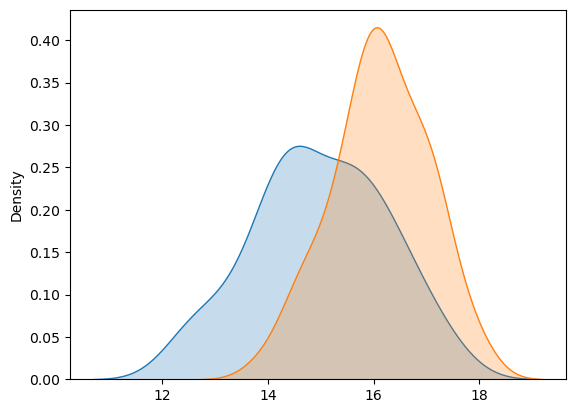

In [101]:
sns.kdeplot(pop_dist2, cbar = True, fill = True)
sns.kdeplot(smpls, cbar = True,fill = True);


# Visual Analysis

## Which products are performing the best, and which are performing the least in terms of revenue?

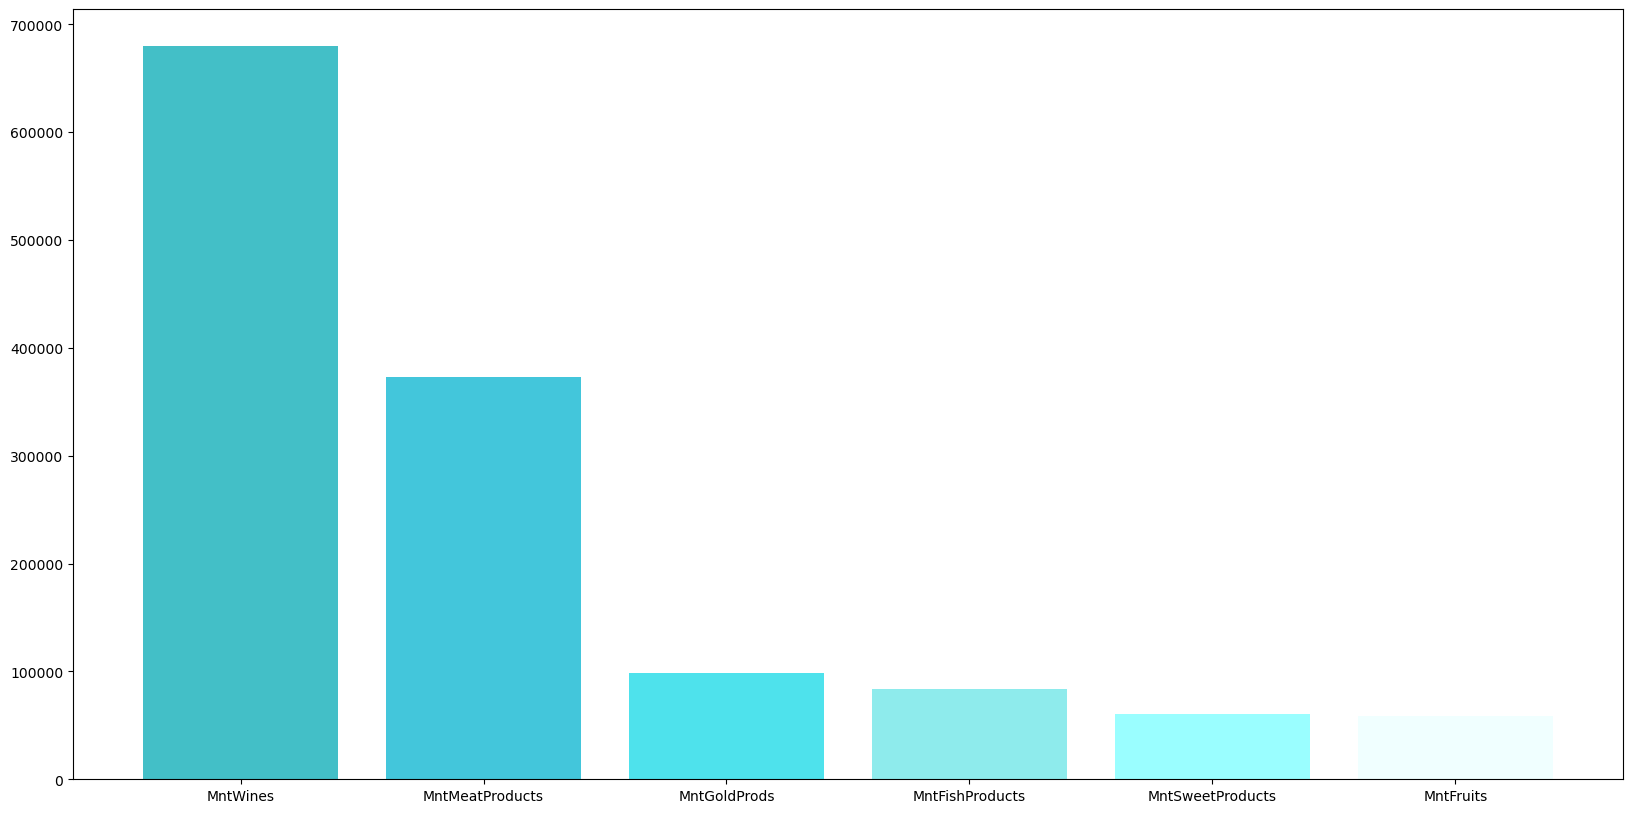

In [102]:
Data=md[['MntWines','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds','MntFruits']]
plt.figure(figsize=(20,10),facecolor='white')
Wines=md['MntWines'].sum()
MeatProducts=md['MntMeatProducts'].sum()
FishProducts=md['MntFishProducts'].sum()
MntSweetProducts=md['MntSweetProducts'].sum()
MntGoldProds=md['MntGoldProds'].sum()
MntFruits=md['MntFruits'].sum()

d = {'MntWines':Wines,'MntMeatProducts':MeatProducts,'MntGoldProds':MntGoldProds,
     'MntFishProducts':FishProducts,'MntSweetProducts':MntSweetProducts,'MntFruits':MntFruits}
plt.bar(x = d.keys(), height = d.values(),color =['#43BFC7','#43C6DB','#4EE2EC','#8EEBEC','#9AFEFF','Azure']);

In [103]:
print(f"The best performing is {Data.sum(axis=0).idxmax()}")

The best performing is MntWines


In [104]:
print(f"The least performing is {Data.sum(axis=0).idxmin()}")

The least performing is MntFruits


# Is there any pattern between the age of customers and the last campaign acceptance rate?

In [105]:
v1 = md[["Age", "Response"]]

In [106]:
v1.Age.max()

74

In [107]:
v1['age_bins'] = pd.cut(x= v1['Age'],bins = 6 ,labels=['18-30', '30-40', '40-50','50-60','60-70','70-80'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_11276\2324081283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1['age_bins'] = pd.cut(x= v1['Age'],bins = 6 ,labels=['18-30', '30-40', '40-50','50-60','60-70','70-80'])


In [108]:
v1.head(10)

,Age,Response,age_bins
0,44,1,40-50
1,53,1,50-60
2,56,0,60-70
3,47,0,50-60
4,25,1,18-30
5,56,1,60-70
6,60,1,60-70
7,47,0,50-60
8,60,0,60-70
9,60,0,60-70


In [109]:
v1.drop("Age", axis = 1, inplace= True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_11276\1655882686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1.drop("Age", axis = 1, inplace= True)


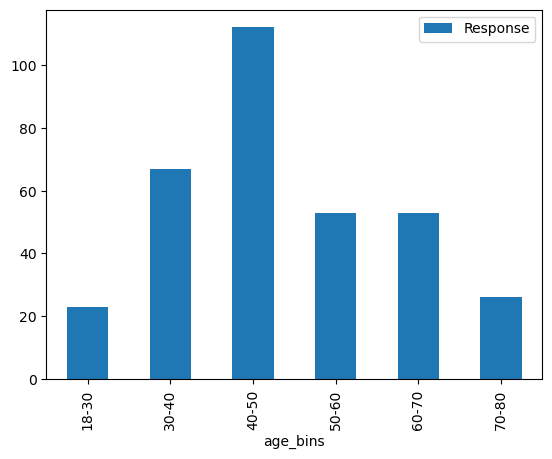

In [110]:
v1.groupby("age_bins").sum().plot(kind= "bar");

    we can see that the group that responded the most to the last campaign is the one aged from 40 to 50 years old.

## 	Which Country has the greatest number of customers who accepted the last campaign?

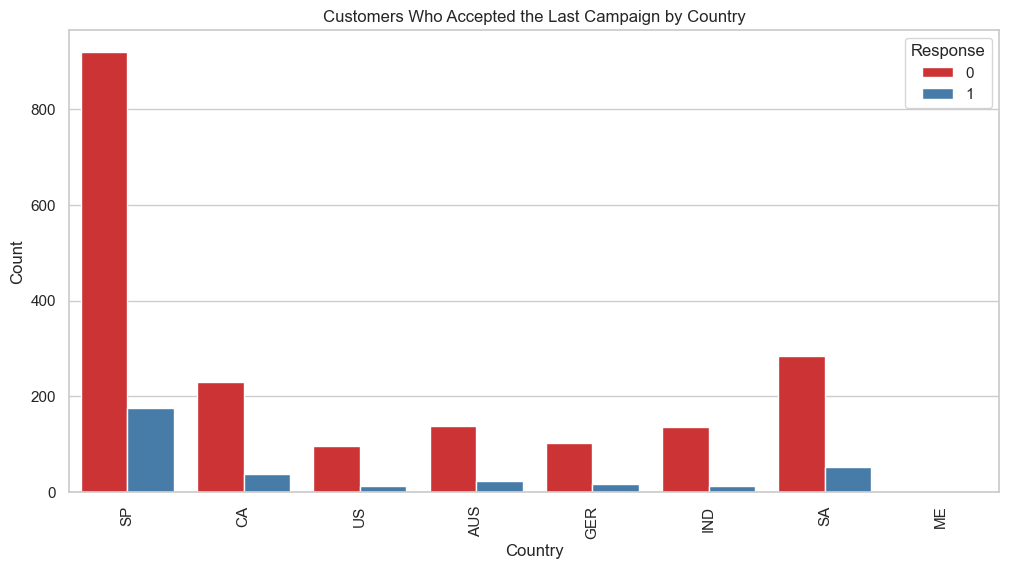

In [111]:
data = pd.read_csv("C:/Users/Acer/Documents/Sadaia T5/Python2/MarketingCampaignProj/1689942193_marketing_data/marketing_data.csv")
# Create a count plot
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Countplot
ax = sns.countplot(data=data, x="Country", hue="Response", palette="Set1")

# Customize the plot
ax.set_title("Customers Who Accepted the Last Campaign by Country")
ax.set_xlabel("Country")
ax.set_ylabel("Count")

# Show the plot
plt.xticks(rotation=90)
plt.legend(title="Response", loc="upper right")
plt.show();

In [112]:
md.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Total_Children', 'total_spending',
       'Complain_0', 'Complain_1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US', 'channel_purch', 'total_purch'],
      dtype='object')

## Is there any pattern in the no. of children at home and total spend?

In [113]:
md.columns

Index(['ID', 'Education', 'Income', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Age', 'Total_Children', 'total_spending',
       'Complain_0', 'Complain_1', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow', 'Country_AUS',
       'Country_CA', 'Country_GER', 'Country_IND', 'Country_ME', 'Country_SA',
       'Country_SP', 'Country_US', 'channel_purch', 'total_purch'],
      dtype='object')

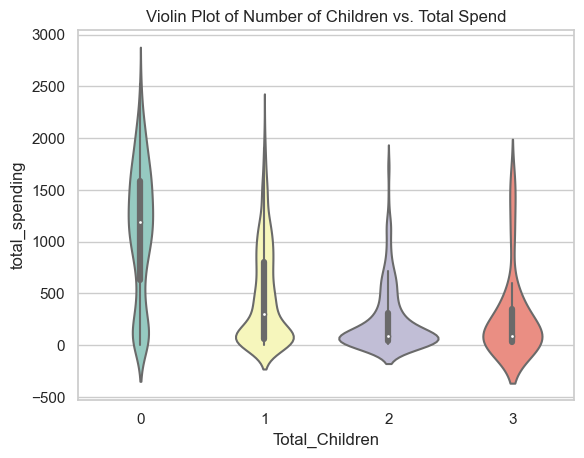

In [114]:
plt.title('Violin Plot of Number of Children vs. Total Spend')
plt.xlabel('Number of Children')
plt.ylabel('Total Spend')
sns.violinplot(x=md['Total_Children'], y=md["total_spending"], palette = 'Set3');

## Education background of the customers who complained in the last 2 years.

In [115]:
v4 = md[["Education", "Complain_1"]]

In [116]:
v4.value_counts()

Education  Complain_1
1          0             1113
2          0              566
3          0              484
0          0               54
1          1               14
2          1                5
3          1                1
dtype: int64

<Axes: xlabel='Education'>

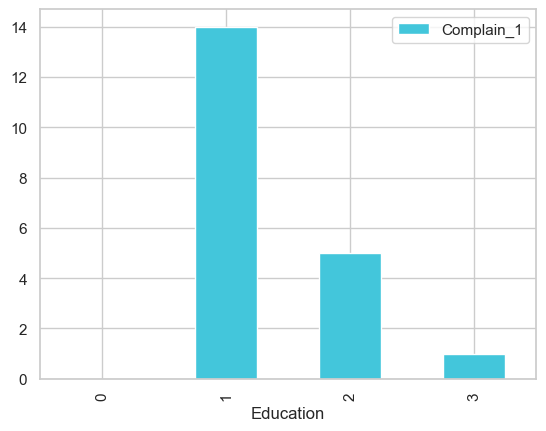

In [117]:

v4.groupby("Education").sum().plot(kind = "bar", color =["#43C6DB"])

## Recources:

preprocessing:
- https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
- https://machinelearningmastery.com/one-hot-encoding-for-categorical-data/